# Analysis of Customers Trends and Behaviour and Modeling with KMeans
---
## Problem Formulation
A company that specialises in high-quality bikes and accessible cycling accessories to riders have provided data for analysis. This is to assist Their marketing team to boost business sells by studying the customers behaviours and trends.

**DATA SOURCE:** Sprocket Central Pty Ltd.

## Background 
This project involves the analysis of a business data. The retail business operates both online and offline, sells a range of bikes. we want to gain insights into the company's performance and identify areas for improvement. majorely in their customer targetting. The project was divided into several phases.

The first phase involved data cleaning and preprocessing, as well as exploratory data analysis (EDA). Data cleaning involved identifying missing values, duplicates, and inconsistencies in the data and correcting them to ensure that the data was accurate and reliable. EDA involved visualizing and summarizing the data to identify patterns and relationships between variables. The EDA phase focused on identifying trends in sales and customer behavior, as well as identifying any correlations between customer demographics and purchasing habits.

The second phase involved segmentation modeling with KMeans clustering. Segmentation modeling involved grouping customers into segments based on their similarities in terms of demographics, purchasing habits, and other factors. KMeans clustering was used to group customers into clusters based on their purchasing behavior and other factors.

The third and final phase involved deployment and report with visualization. The findings from the segmentation modeling phase were deployed in the form of an interactive dashboard and report with visualizations. The dashboard provided the company's management team with real-time insights into its performance, including sales trends, customer behavior, and other key performance indicators. The report with visualizations provided a detailed analysis of the data and recommendations for improvement based on the findings.








In [1]:
# Imoprting Relevant Libraries  
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
import plotly.express as px
import pytz

Our primary objective is to use past transaction data, cunstomer Demography and customer address to be able to segment the new customer data apropriately for marketting campaing

In [2]:
# importing all the data sets obtain from the company 
transactions = pd.read_excel("KPMG_VI_New_raw_data_update_final (1).xlsx", sheet_name =1, header = 1)
newcustomerlist = pd.read_excel("KPMG_VI_New_raw_data_update_final (1).xlsx", sheet_name = 2, header = 1)
customerdemo = pd.read_excel("KPMG_VI_New_raw_data_update_final (1).xlsx", sheet_name = 3, header = 1)
customeraddress = pd.read_excel("KPMG_VI_New_raw_data_update_final (1).xlsx", sheet_name = 4, header = 1)

C:\Users\user\AppData\Local\Temp/ipykernel_4088/3162547210.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  newcustomerlist = pd.read_excel("KPMG_VI_New_raw_data_update_final (1).xlsx", sheet_name = 2, header = 1)
C:\Users\user\AppData\Local\Temp/ipykernel_4088/3162547210.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  customerdemo = pd.read_excel("KPMG_VI_New_raw_data_update_final (1).xlsx", sheet_name = 3, header = 1)


# Data Preprocessing 
### Exploratory Data Analysis and Cleaning
Our first task to explore the datasets and identify all data quality issues and handle them. We will explore the data set one after the other starting with starting with the transactions which will be the bases for other exploration 

In [3]:
# visualising the transaction dataset
transac = transactions.copy()
transac.shape

(20000, 13)

In [4]:
transac.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20


In [5]:
demo = customerdemo.copy()
demo.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0


In [6]:
demo.shape

(4000, 13)

In [7]:
address = customeraddress.copy()
address.head(3)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9


In [8]:
address.shape

(3999, 6)

### Merging Transactions with customer demography and Address
We will merge these datas on Customer_Id starting by checking the customer Id counts in the data set.

We are using `customer_id` because it is a primary key (from the database from which it was extracted) i.e. Another way is because all entries in `customer_id` are unique and appears on each of the datasets apart from the `newcustomer` data 

In [9]:
# Checking the parameters before merging 
transac_id = transac["customer_id"].nunique()
print(f"Number of Unique customer Id in Transaction data is: {transac_id}" )

demo_id = demo["customer_id"].nunique()
print(f"Number of Unique customer Id in Transaction data is: {demo_id}" )

address_id = address["customer_id"].nunique()
print(f"Number of Unique customer Id in Transaction data is: {address_id}" )

Number of Unique customer Id in Transaction data is: 3494
Number of Unique customer Id in Transaction data is: 4000
Number of Unique customer Id in Transaction data is: 3999


from the above it is clear that the customer_Id is not completely accurate since each dataset has different unique number of IDs. this issue can be included in the DATA QUALITY ASSESSMENT REPORT with recommendations on to ensure that such do not happen again 
 

In [10]:
# Merging the dataFrames
merged = pd.merge(transac, demo, on="customer_id")
df =  pd.merge(merged,address, on="customer_id")
df.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6


In [11]:
#checking the new shape of our df
df.shape

(19968, 30)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  int64         
 1   product_id                           19968 non-null  int64         
 2   customer_id                          19968 non-null  int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  float64       
 5   order_status                         19968 non-null  object        
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

In [13]:
# cheking to see the Null value counts 
df.isnull().sum().sort_values(ascending = False).head(15)

job_industry_category      3222
job_title                  2379
default                    1451
last_name                   642
DOB                         446
tenure                      446
online_order                359
brand                       195
product_line                195
product_class               195
product_size                195
standard_cost               195
product_first_sold_date     195
owns_car                      0
transaction_id                0
dtype: int64

## Dealing with missing values

In [14]:
# Inspecting the `job_industry_category`
df["job_industry_category"].value_counts()

Manufacturing         4014
Financial Services    3880
Health                3099
Retail                1758
Property              1289
IT                    1076
Entertainment          698
Argiculture            578
Telecommunications     354
Name: job_industry_category, dtype: int64

Since the `job_industry_category` has 9 unique values or job industries we will categorise the missing ones as `other` i.e. the category that does not fall in any of the above listed.

In [15]:
# Filling the missing values with `other`
df["job_industry_category"] = df["job_industry_category"].fillna(value = "other")

the `job_title` feature also has many missing values we will fill also with `other` (others may include even the unemployed )

In [16]:
# Filling the missing Values with `other`
df["job_title"] = df["job_title"].fillna(value="other")

In [17]:
# Inspecting the default column
df["default"].head()

0                          ã»(ï¿£âï¿£)ã»:*:
1                          ã»(ï¿£âï¿£)ã»:*:
2                          ã»(ï¿£âï¿£)ã»:*:
3    ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®
4    ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®
Name: default, dtype: object

checking through the `default` we can see that the data is damages, The `last_name` column also may not be relevant to our analysis. Hence, we drop the two columns.

In [18]:
# Dropping the irrelevant columns with more missing values
df.drop(columns =["default","last_name","first_name"], inplace=True)

In [19]:
df_ = df.copy()

Before dropping the observations with missing values we calculate the impact it will has on the whole dataset. we subtract the number of observation after dropping from the original df and then we take the percentage of the residual with respect to the original number of observations 

In [20]:
# Dropping the missing values
df = df.dropna()

# Checking the percentage of missing values inpact
lost = ((df_.shape[0] - df.dropna().shape[0])/df_.shape[0])*100
print(f"As we drop the missing values the inpact is {round(lost,2)}% of the total observations")

As we drop the missing values the inpact is 4.92% of the total observations


In [21]:
df.isnull().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state           

### Investigating elements within each feature

In [22]:
# Initialising a list to collect cols with desired features
cols_with_small_features = []

# Looping through the columns to check for columns with unique features
for col in df.columns:
    unique = np.unique(df[col])
    num_unique = len(unique)
    
    # Checking if the Feature has less than 10 unique values 
    if num_unique<10:
        cols_with_small_features.append(col)
        print(f"the number of unique values in {col} is {num_unique} and they are: {unique}")
    
    else:
        print (f"the number of unique values in {col} is {num_unique}")

print("--"*50)

# Visulizing the collumns with less than 10 features 
print(cols_with_small_features)

the number of unique values in transaction_id is 18986
the number of unique values in product_id is 101
the number of unique values in customer_id is 3411
the number of unique values in transaction_date is 364
the number of unique values in online_order is 2 and they are: [0. 1.]
the number of unique values in order_status is 2 and they are: ['Approved' 'Cancelled']
the number of unique values in brand is 6 and they are: ['Giant Bicycles' 'Norco Bicycles' 'OHM Cycles' 'Solex' 'Trek Bicycles'
 'WeareA2B']
the number of unique values in product_line is 4 and they are: ['Mountain' 'Road' 'Standard' 'Touring']
the number of unique values in product_class is 3 and they are: ['high' 'low' 'medium']
the number of unique values in product_size is 3 and they are: ['large' 'medium' 'small']
the number of unique values in list_price is 100
the number of unique values in standard_cost is 100
the number of unique values in product_first_sold_date is 100
the number of unique values in gender is 6 an

In [23]:
# viewing the Unique values based on their data types
num_dtype = df.select_dtypes("number").nunique()
obj_dtype = df.select_dtypes("object").nunique()
print( "The NUMBER dtype features has the following number of unique values \n", num_dtype)
print("--"*50)
print( "While the OBJECT dtype features has the following number of unique values \n",obj_dtype)

The NUMBER dtype features has the following number of unique values 
 transaction_id                         18986
product_id                               101
customer_id                             3411
online_order                               2
list_price                               100
standard_cost                            100
past_3_years_bike_related_purchases      100
tenure                                    22
postcode                                 829
property_valuation                        12
dtype: int64
----------------------------------------------------------------------------------------------------
While the OBJECT dtype features has the following number of unique values 
 order_status                2
brand                       6
product_line                4
product_class               3
product_size                3
gender                      6
job_title                 196
job_industry_category      10
wealth_segment              3
deceased_indicator  

# Feature Engineering 
#### creating Metrics from datetime data 


In [24]:
#how old was the product before the user bought it
df["product_age"] = df["transaction_date"].dt.year - df["product_first_sold_date"].dt.year
df["product_age"].head()

0     5
1    14
2     7
3     3
4     6
Name: product_age, dtype: int64

Text(0, 0.5, 'Frequency')

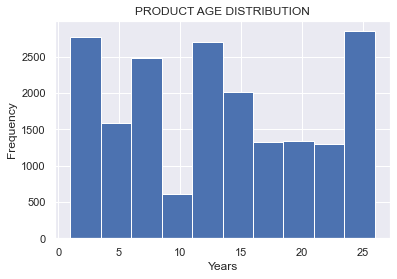

In [25]:
df["product_age"].hist()
plt.title("PRODUCT AGE DISTRIBUTION")
plt.xlabel("Years")
plt.ylabel("Frequency")

In [26]:
# creating months from the transac_dates
df["transaction_month"] = df['transaction_date'].dt.month

Text(0, 0.5, 'Frequency')

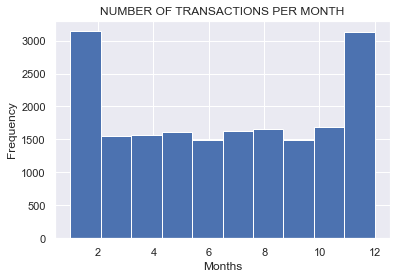

In [27]:
df["transaction_month"].hist()
plt.title("NUMBER OF TRANSACTIONS PER MONTH")
plt.xlabel("Months")
plt.ylabel("Frequency")

In [28]:
#creating the age column
df["age"] = df["transaction_date"].dt.year - df["DOB"].dt.year
df["age"].nunique()

56

In [35]:
#understanding the age distribution
print('the mean is = ',df['age'].mean())
print('the STD is = ',df['age'].std())
print('the variance is = ',df['age'].var())

print('the range is = ',df['age'].max()-df['age'].min())


the mean is =  39.89971557990098
the STD is =  12.90268076190024
the variance is =  166.4791708435106
the range is =  159


Text(0, 0.5, 'Frequency')

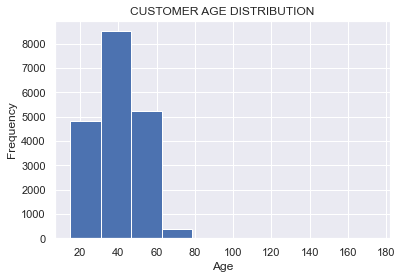

In [36]:
#Checking for outliers in age
df["age"].hist()
plt.title("CUSTOMER AGE DISTRIBUTION")
plt.xlabel("Age")
plt.ylabel("Frequency")

The age has outliers. meaning that we're having people with morethan 150 years buying the product this can be due to error in entering customer age. we will drop observations with age morethan 100.

Since the age has 56 unique values we will group them and conver to ordinal variable

Text(0.5, 1.0, 'Age distribution [no outliers]')

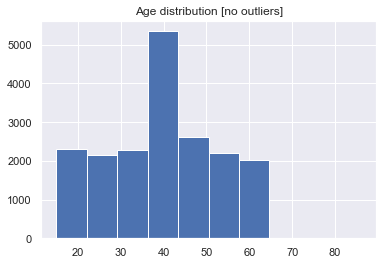

In [37]:
# After careful inspection of the affected columns we will drop the 0.0005% of the last quantile 
q = df['age'].quantile(.9995)
df = df[df["age"]<=q]
df['age'].hist()
plt.title("Age distribution [no outliers]")

In [38]:
print('the mean is = ',df['age'].mean())
print('the STD is = ',df['age'].std())
print('the variance is = ',df['age'].var())

print('the range is = ',df['age'].max()-df['age'].min())


the mean is =  39.84318684792918
the STD is =  12.608141739903386
the variance is =  158.965238133494
the range is =  71


Text(0.5, 1.0, 'Age Distribution')

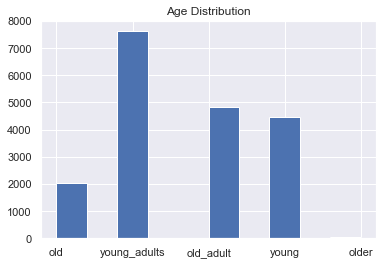

In [31]:
# Creating an age_band to categorise the age for better analysis
df["age_band"] = pd.cut(df["age"],5 ,labels=False )

#renaming the labels 
df["age_band"] = df["age_band"].replace((0,1,2,3,4),("young","young_adults","old_adult","old","older"))

# Visualising
df["age_band"].hist()
plt.title("Age Distribution")

The `gender` column has two unique observations which are inconsistent to each other so we replace the inconsistent. similarly the `state` columns has some inconsistencies

## Dealing with Incosistent Entries

In [32]:
# replacing The inconsistent entries 
df['gender'].replace(("F","Femal","M"),("Female","Female","Male"), inplace=True)

In [33]:
# replacing The inconsistent entries 
df["state"].replace(("New South Wales","Victoria"),("NSW","VIC"), inplace=True)

Text(0.5, 1.0, 'ONLINE_ORDER')

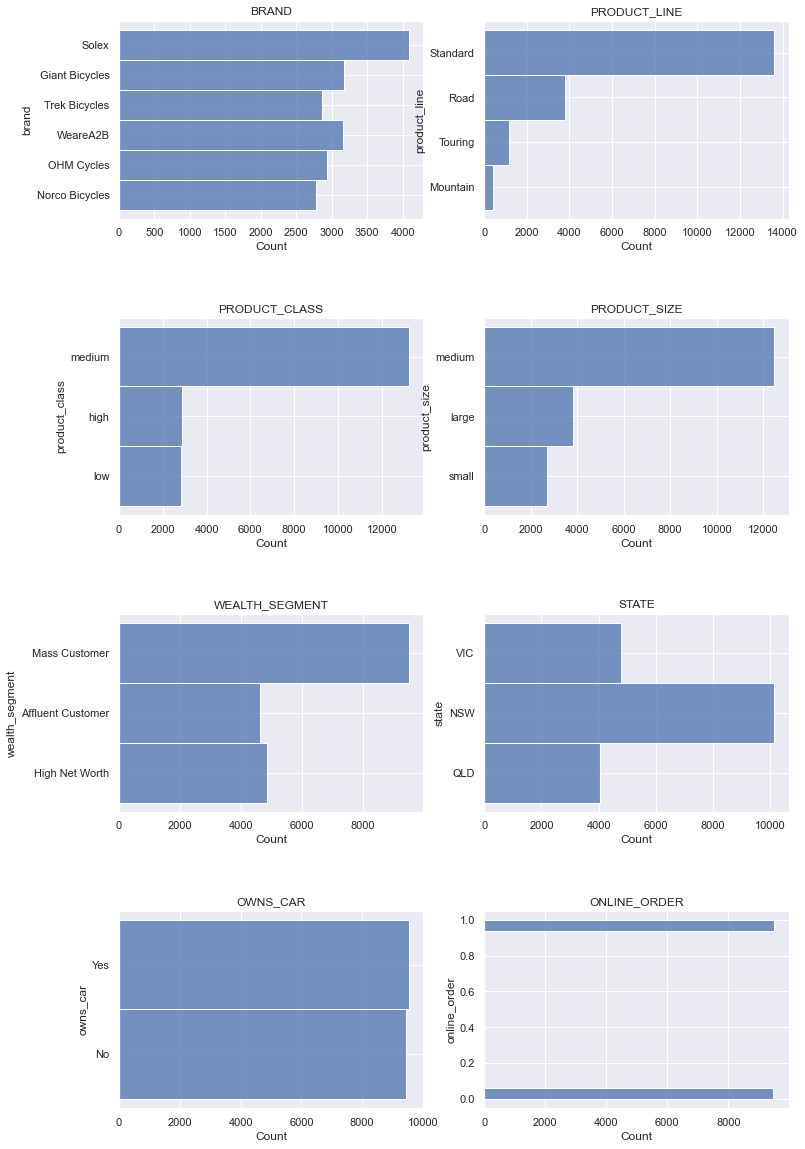

In [34]:
# visualizinfg some of the features with less unique value for better data understanding 
fig, axes = plt.subplots(nrows=4,ncols=2, figsize = [12,20])
fig.subplots_adjust(hspace=0.5)

sns.histplot(y = df["brand"], ax=axes[0,0])
axes[0,0].set_title("BRAND")

sns.histplot(y = df["product_line"], ax=axes[0,1])
axes[0,1].set_title("product_line".upper())

sns.histplot(y = df["product_class"], ax=axes[1,0])
axes[1,0].set_title("product_class".upper())

sns.histplot(y = df["product_size"], ax=axes[1,1])
axes[1,1].set_title("product_size".upper())

sns.histplot(y = df["wealth_segment"], ax=axes[2,0])
axes[2,0].set_title("wealth_segment".upper())

sns.histplot(y = df["state"], ax=axes[2,1])
axes[2,1].set_title("state".upper())

sns.histplot(y = df["owns_car"], ax=axes[3,0])
axes[3,0].set_title("owns_car".upper())

sns.histplot(y = df["online_order"], ax=axes[3,1])
axes[3,1].set_title("online_order".upper())


In [35]:
df.nunique()

transaction_id                         18978
product_id                               101
customer_id                             3410
transaction_date                         364
online_order                               2
order_status                               2
brand                                      6
product_line                               4
product_class                              3
product_size                               3
list_price                               100
standard_cost                            100
product_first_sold_date                  100
gender                                     2
past_3_years_bike_related_purchases      100
DOB                                     3045
job_title                                196
job_industry_category                     10
wealth_segment                             3
deceased_indicator                         2
owns_car                                   2
tenure                                    22
address   

### Avoiding curse of dimensionality trap 
The curse of dimensionality refers to the difficulties that arise when analyzing data with many dimensions, such as when there are many features or variables being considered. One issue is that the data can become sparse and dispersed, making it difficult to identify meaningful patterns. Another issue is that as the number of dimensions increases, the amount of data needed to fill the space grows exponentially, making it difficult to obtain enough data to reliably estimate relationships between variables. As a remedy we will drop the columns with high dimensions and those with very low e.g. `country` which has only one unique variable.

### Avoiding multicolinearity 
Multicollinearity is a phenomenon that occurs when two or more variables are highly correlated with each other. This can cause problems in the analysis, as it can lead to difficulties in distinguishing the effects of the individual variables. to avoid this problem we will drop one of some highly correlated columns e.g. `Job_indusctry` vs `Job_title` (we will choose to drop `job_title` since it has higher dimension).

In [36]:
df.drop(columns = ["address","postcode","job_title",'job_title',"transaction_id","customer_id","transaction_date","product_first_sold_date","DOB", "country","age"], inplace = True)

In [37]:
df.shape

(18978, 21)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18978 entries, 0 to 19967
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   product_id                           18978 non-null  int64  
 1   online_order                         18978 non-null  float64
 2   order_status                         18978 non-null  object 
 3   brand                                18978 non-null  object 
 4   product_line                         18978 non-null  object 
 5   product_class                        18978 non-null  object 
 6   product_size                         18978 non-null  object 
 7   list_price                           18978 non-null  float64
 8   standard_cost                        18978 non-null  float64
 9   gender                               18978 non-null  object 
 10  past_3_years_bike_related_purchases  18978 non-null  int64  
 11  job_industry_category       

## Exporting our pre-processed data for modelling 

In [39]:
#df.to_csv("pre_processed.csv", sep=',', index=False, header=True, encoding=None)

### in the next project we will model this data Using unsupervised learning 

KeyError: 'age'